# The Dataset, the source and the details

Database: Placement_Data_Full_Class.csv

Source Database: Kaggle

Link: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

My notebook in kaggle: https://www.kaggle.com/danielegiangrasso/a-short-data-analysis-with-glm-regression?scriptVersionId=34712705

Columns:
    
    •	sl_no = Serial Number
    •	gender = Gender: Male='M', Female='F'
    •	ssc_p = Secondary Education percentage- 10th Grade
    •	ssc_b = Board of Education- Central/ Others
    •	hsc_p = Higher Secondary Education percentage- 12th Grade
    •	hsc_b = Board of Education- Central/ Others
    •	hsc_s = Specialization in Higher Secondary Education
    •	degree_p = Degree Percentage
    •	degree_t = Under Graduation(Degree type)- Field of degree education
    •	workex = Work Experience
    •	etest_p = Employability test percentage ( conducted by college)
    •	specialisation = Post Graduation(MBA)- Specialization
    •	mba_p = MBA percentage
    •	status = Status of placement- Placed/Not placed
    •	salary = Salary offered by corporate to candidates
    
The below link is to better understand the meaning of thf Board education in India:
https://www.jagranjosh.com/articles/different-school-boards-in-india-1525780883-1

Briefly, the most common board in India is the Central Board whose general goal is: "always works with a vision to provide stress-free education to its students by adapting innovative teaching methods infused with psychological and instructive principles".
Other boards have different goals and adopt different methods of teaching (have a look at the above link if you want to find out more).


The final purpose of the analysis is to apply the logistic regression and see how the different variables can help to make the prediction on the status variable. First of all we need to know more about the data that we have for our analysis. 
We set the directory, read the csv to load the dataset and analyse the structure of the dataset:

In [1]:
#install.packages('dummies')
#install.packages('corrplot')
#install.packages("tidyverse")
#install.packages("funModeling")
#install.packages("Hmisc", dependencies = TRUE)
options(warn=-1)
suppressMessages(library(funModeling))
suppressMessages(library(tidyverse))
suppressMessages(library(Hmisc))
library('funModeling') 
library('tidyverse')
library('Hmisc')
library('dummies')
library('ROCR')
library('corrplot')

dummies-1.5.6 provided by Decision Patterns

corrplot 0.84 loaded


In [2]:
setwd('C:/Users/39333/Desktop')
dataframe <- read.csv(file = 'Placement_Data_Full_Class.csv', header = T, na.strings = c(""))
### A Quick look at the database
str(dataframe)
df <- dataframe[ -c(1)]
df[df==""] <- NA
sapply(df,function(x) sum(is.na(x)))
sapply(df, function(x) length(unique(x)))

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

gender          ssc_p          ssc_b          hsc_p          hsc_b 
             0              0              0              0              0 
         hsc_s       degree_p       degree_t         workex        etest_p 
             0              0              0              0              0 
specialisation          mba_p         status         salary 
             0              0              0             67

gender          ssc_p          ssc_b          hsc_p          hsc_b 
             2            103              2             97              2 
         hsc_s       degree_p       degree_t         workex        etest_p 
             3             89              3              2            100 
specialisation          mba_p         status         salary 
             2            205              2             46

We can note that our dataset is composed by 15 variables and contains 215 observations that relate to different people.  There are 8 categorical variables and 7 numerical ones. The dataset has a binary response (outcome, dependent) variable called status and it varies berween 2 values: Placed, Not Placed. There are 14 potential predictors that we could use to evaluate if they are or not a significant and how they will affect the y variable. 

Having a first look at the variable, we can drop the variable "sl_no" because it is just a serial number that does not add any value to our analysis. To analyse our dataset we can also have a better look at it in terms of how many NA (missing values) and unique values there are in the dataset. This will allow us to understand if there are columns with a large number of NA and how many different values we can expect in each column. This first step helps to define if there are variables with too high a number of missing values and consecuently drops them from the dataset. Only the salary variable seems to have a missing value, but we will keep this in mind and drop it when it is time.

# 2 A quick look at the variables.

Above I have just turned off the warning message to keep the page clean

     ssc_p           hsc_p          degree_p        etest_p         mba_p      
 Min.   :40.89   Min.   :37.00   Min.   :50.00   Min.   :50.0   Min.   :51.21  
 1st Qu.:60.60   1st Qu.:60.90   1st Qu.:61.00   1st Qu.:60.0   1st Qu.:57.95  
 Median :67.00   Median :65.00   Median :66.00   Median :71.0   Median :62.00  
 Mean   :67.30   Mean   :66.33   Mean   :66.37   Mean   :72.1   Mean   :62.28  
 3rd Qu.:75.70   3rd Qu.:73.00   3rd Qu.:72.00   3rd Qu.:83.5   3rd Qu.:66.25  
 Max.   :89.40   Max.   :97.70   Max.   :91.00   Max.   :98.0   Max.   :77.89  
                                                                               
     salary      
 Min.   :200000  
 1st Qu.:240000  
 Median :265000  
 Mean   :288655  
 3rd Qu.:300000  
 Max.   :940000  
 NA's   :67      

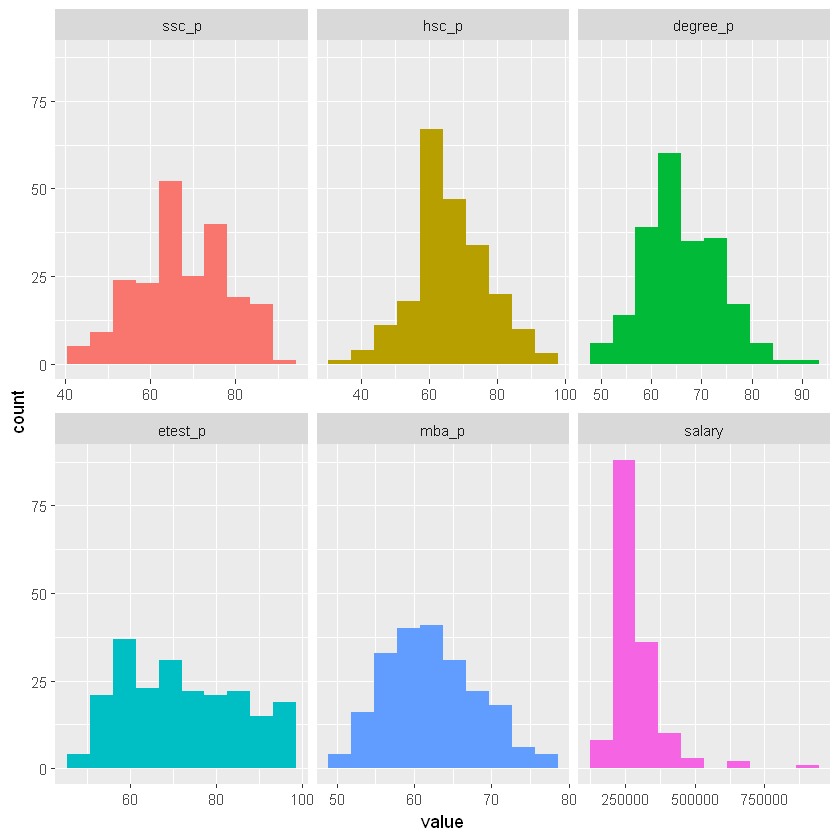

In [3]:
#Analising Numerical

numerical =df %>% select(ssc_p, hsc_p, degree_p, etest_p, mba_p, salary)

basic_eda <- function(numerical)

 {  plot_num(numerical)
  summary(numerical)
}

basic_eda(numerical)
#count(names(numerical))

From the above, we can see the distributions of the numerical varibles. We can see that the frequency for the four education variables (Secondary Education, Higher Secondary, Degree and MBA) tend to be higher for the central values. In all of them, both smaller and higher percentages are less frequent. You can also note that the empoyability test has a more uniform frequency, while salary shows higher frequency for lower values.

In [4]:
categorical =df %>% select(gender, ssc_b, hsc_b, hsc_s, degree_t, workex,specialisation, status)

#to run separately below lines (37 to 44, need to be run separately )

freq(data=categorical, input = c('gender','ssc_b','hsc_b', 'hsc_s', 'degree_t', 'workex'
                                 , 'specialisation', 'status'), plot = FALSE )

  gender frequency percentage cumulative_perc
1      M       139      64.65           64.65
2      F        76      35.35          100.00

    ssc_b frequency percentage cumulative_perc
1 Central       116      53.95           53.95
2  Others        99      46.05          100.00

    hsc_b frequency percentage cumulative_perc
1  Others       131      60.93           60.93
2 Central        84      39.07          100.00

     hsc_s frequency percentage cumulative_perc
1 Commerce       113      52.56           52.56
2  Science        91      42.33           94.89
3     Arts        11       5.12          100.00

   degree_t frequency percentage cumulative_perc
1 Comm&Mgmt       145      67.44           67.44
2  Sci&Tech        59      27.44           94.88
3    Others        11       5.12          100.00

  workex frequency percentage cumulative_perc
1     No       141      65.58           65.58
2    Yes        74      34.42          100.00

  specialisation frequency percentage cumulative

[1] "Variables processed: gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status"

Some insight on the categorical variables: From the above tables we can see that the percentage of males is higher, most of the secondary schools and higher secondary schools were part of the board. Commerce is the prevalent specialisation in High School, while Commerce & Marketing is the prevalent course as degree. Most people had work experience and the main MBA specialisation was Marketing and Finance. 68.84% of the sample is employed.

In [5]:
df.new = subset(df, select = c(2,4,7,10,12))
print(names(df.new))

[1] "ssc_p"    "hsc_p"    "degree_p" "etest_p"  "mba_p"   


In the above, I create a new dataset for my anlysis and I dropped the salary because is not very useful in predicting the placement of a student. Indeed this variable has a value only if the student is placed.

In [6]:

df.cor = df.new
df.cor$gender = dummy(df$gender)
df.cor$ssc_b = dummy(df$ssc_b)
df.cor$hsc_b = dummy(df$hsc_b)
df.cor$hsc_s = dummy(df$hsc_s)
df.cor$degree_t = dummy(df$degree_t)
df.cor$workex = dummy(df$workex)
df.cor$specialisation = dummy(df$specialisation)
df.cor$status = dummy(df$status)
print(names(df.cor))


 [1] "ssc_p"          "hsc_p"          "degree_p"       "etest_p"       
 [5] "mba_p"          "gender"         "ssc_b"          "hsc_b"         
 [9] "hsc_s"          "degree_t"       "workex"         "specialisation"
[13] "status"        


I have created dummy varibles because there are many categorical variables that do not permit me to plot a correletion matrix.

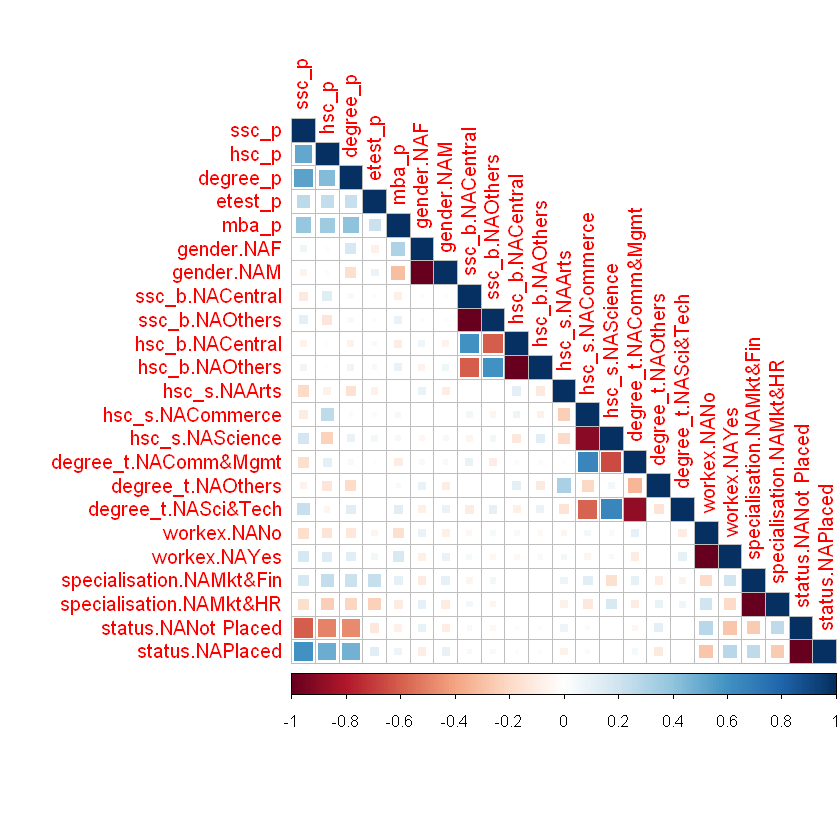

In [7]:
df.cor.plot <- cor(df.cor)
corrplot(df.cor.plot,method = c("square") , type = "lower", graphType="heatmap")

From the correlation matrix we can see a correlation in the study paths and also in being part of a board of education structure between secondary and high secondary school. There appears to be a strong correlation between status and the grades across different levels of education: a positive correlation with placed and negative with not placed.

In [8]:
df.new$gender = factor(df$gender)
df.new$ssc_b = factor(df$ssc_b)
df.new$hsc_b = factor(df$hsc_b)
df.new$hsc_s = factor(df$hsc_s)
df.new$degree_t = factor(df$degree_t)
df.new$workex = factor(df$workex)
df.new$specialisation = factor(df$specialisation)
df.new$status = factor(df$status)
str(df.new)
print(names(df.new))

'data.frame':	215 obs. of  13 variables:
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 [1] "ssc_p"          "hsc_p"          "degree_p"       "etest_p"      

In the above cell I converted in factors the values to run the glm model and the new dataset df.new is the one that I will use in the glm regression.

In [9]:
model1 <- glm(status ~. ,family=binomial(link='logit'),data=df.new)
summary(model1)


Call:
glm(formula = status ~ ., family = binomial(link = "logit"), 
    data = df.new)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.30074  -0.14447   0.07164   0.31692   2.32685  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -18.37171    5.32356  -3.451 0.000558 ***
ssc_p                  0.22891    0.04682   4.889 1.01e-06 ***
hsc_p                  0.10721    0.03778   2.838 0.004541 ** 
degree_p               0.18577    0.05558   3.343 0.000830 ***
etest_p               -0.01416    0.02266  -0.625 0.532060    
mba_p                 -0.21413    0.05852  -3.659 0.000253 ***
genderM                1.19433    0.68598   1.741 0.081673 .  
ssc_bOthers            0.22767    0.71685   0.318 0.750787    
hsc_bOthers            0.33074    0.73509   0.450 0.652757    
hsc_sCommerce         -1.49787    1.36117  -1.100 0.271143    
hsc_sScience          -0.91121    1.45714  -0.625 0.531746    
degree_tOthers   

The above is the model that includes all the 13 variables. However I will run the new model coiuntaining only the 5 statistically significant variables and afterwards comment on the results.

In [10]:
df = df.new[, c("status","ssc_p" ,"hsc_p", "degree_p", "mba_p", "workex")]
print(names(df))
model2 <- glm(status ~. ,family=binomial(link='logit'),data=df)
summary(model2)

[1] "status"   "ssc_p"    "hsc_p"    "degree_p" "mba_p"    "workex"  



Call:
glm(formula = status ~ ., family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.21824  -0.17166   0.09199   0.38757   2.16438  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -15.48852    3.96106  -3.910 9.22e-05 ***
ssc_p         0.19214    0.03761   5.109 3.25e-07 ***
hsc_p         0.11948    0.03499   3.415 0.000637 ***
degree_p      0.14975    0.04769   3.140 0.001690 ** 
mba_p        -0.22805    0.04985  -4.575 4.76e-06 ***
workexYes     2.26667    0.64652   3.506 0.000455 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 266.77  on 214  degrees of freedom
Residual deviance: 112.47  on 209  degrees of freedom
AIC: 124.47

Number of Fisher Scoring iterations: 7


 # Interpretation of GLM Model

From the above, it appears that the main variable that positively influences the placement is the presence of work experience. As we expected having a higher percentage as grade in the different levels of education (secondary, high secondary and in degree) gives a higher probability of placement. On the other hand, surprisingly having a higher grade in MBA gives less probabilty of being placed. 
Having a work experience is the most influencial variable in a positive way.

In [11]:
exp(model2$coefficients)
confint(model2)

(Intercept)        ssc_p        hsc_p     degree_p        mba_p    workexYes 
1.876814e-07 1.211846e+00 1.126915e+00 1.161544e+00 7.960811e-01 9.647202e+00

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-24.06619380,-8.3653429
ssc_p,0.12460670,0.2735808
hsc_p,0.05574894,0.1939107
degree_p,0.05980384,0.2485446
mba_p,-0.33266266,-0.1355559
workexYes,1.08929872,3.6510087


Getting the exponential of the coefficients help us in th interpretation of the data:
    - if we increase by 1 the ssc_p the probability to be placed increases by 1.21
    - if we increase by 1 the hsc_p the probability to be placed increases by 1.12
    - if we increase by 1 the degree_p the probability to be placed increases by 1.16
    - if we increase by 1 the mba_p the probability to be placed increases by 0.79
    - if we increase by 1 the workexYes the probability to be placed increases by 9.64
  


In [12]:
print("comparing the differences between the null model and the model with variables ")

chi.model2 <- model2$null.deviance - model2$deviance
print(paste('difference in variance',chi.model2))
degfree.model2 <- model2$df.null - model2$df.residual
print(paste('difference in variance',degfree.model2))
p.value <- ( 1- pchisq(chi.model2,degfree.model2))
print(paste('p-values is ',p.value))

[1] "comparing the differences between the null model and the model with variables "
[1] "difference in variance 154.299616364415"
[1] "difference in variance 5"
[1] "p-values is  0"


because the p-values are smaller than 0.01, I can say that the we can reject the hp for chi-sqr that the model2 is not better than the null model

In [13]:
anova
anova(model2, test="Chisq")

function (object, ...) 
UseMethod("anova")
<bytecode: 0x000000003fac5ea8>
<environment: namespace:stats>

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,214,266.7707,NA
ssc_p,1,96.496703,213,170.2740,8.939258e-23
hsc_p,1,15.953665,212,154.3203,6.491199e-05
degree_p,1,5.162563,211,149.1578,2.307881e-02
mba_p,1,20.748975,210,128.4088,5.235959e-06
workex,1,15.937710,209,112.4711,6.546142e-05


The difference between the null deviance and the residual deviance shows how our model is doing against the null model (a model with only the intercept). The wider this gap, the better. Analyzing the table we can see the drop in deviance when adding each variable one at a time.

# Assessing the predictive ability of the model

In [14]:
df$status <- ifelse(df$status == 'Placed',1,0)
train <- df[1:170,]
test <- df[170:215,]

I split the dataset in two: training (80% of the data) and in test (20% of the data)

In [15]:
modelTrain <- glm(status ~. ,family=binomial(link='logit'),data=train)
fitted.results <- predict(modelTrain,newdata = test, type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)
misClasificError <- mean(fitted.results != df$status)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.53953488372093"


The accuracy in prediction is not that good.

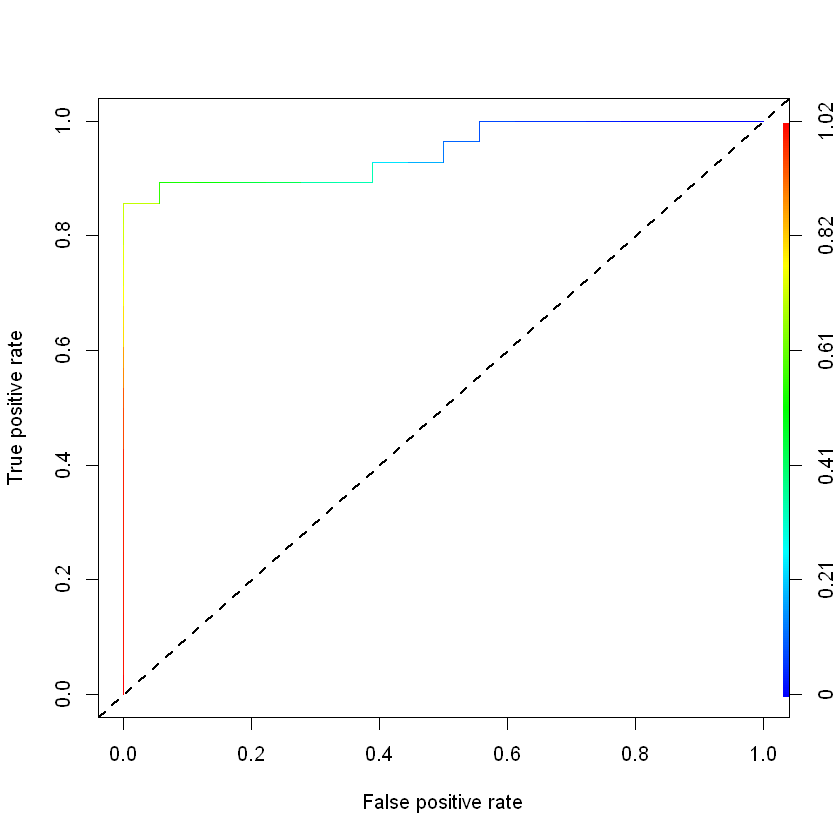

In [16]:
p <- predict(modelTrain,newdata = test, type='response')
pr <- prediction(p, test$status)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf,colorize=TRUE)
abline(0,1,lwd = 2, lty = 2)

In [17]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.9464286

The AUC (area under the curve) of the ROC curve is computed to be 0.95. It is said to be about 95% good at identifying positive value and it is considered a acceptable/fair classifier model.